### Imorting needed packages

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Load and read the data using pandas dataframe

In [5]:
df = pd.read_csv("drug200.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.head(9)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY


In [7]:
print(df["Sex"].unique())
print(df["BP"].unique())
print(df["Cholesterol"].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [12]:
cdf = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K", "Drug"]]
x = cdf[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
y = cdf[["Drug"]].values

print(x[:5])
print(y[:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
[['drugY']
 ['drugC']
 ['drugC']
 ['drugX']
 ['drugY']]


## Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
x[:, 1] = le_sex.fit_transform(x[:, 1])

le_bp = LabelEncoder()
x[:, 2] = le_bp.fit_transform(x[:, 2])

le_ch = LabelEncoder()
x[:, 3] = le_ch.fit_transform(x[:, 3])

### train and Test dataset

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

print(x_train.shape)
print(y_train.shape)

(160, 5)
(160, 1)


### Setting up the decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(x_train, y_train)

In [16]:
y_hat = clf.predict(x_test)

In [17]:
print(y_test[:5].ravel())
print(y_hat[:5])

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


In [18]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_hat)
print(f"the accuracy is: {acc}")

the accuracy is: 0.95


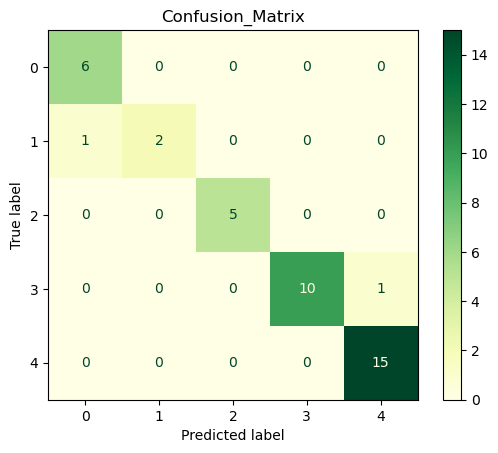

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

c_m = confusion_matrix(y_test, y_hat)
cm_visualization = ConfusionMatrixDisplay(confusion_matrix=c_m)
cm_visualization.plot(cmap="YlGn")
plt.title("Confusion_Matrix")
plt.show()

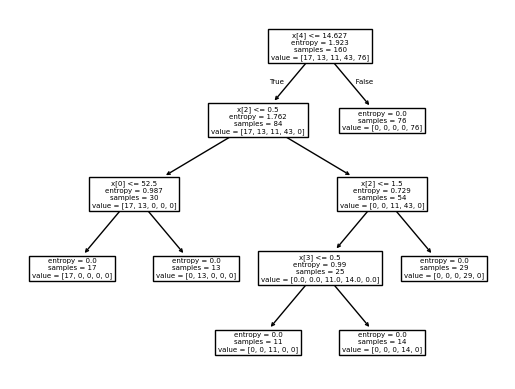

In [20]:
from sklearn.tree import plot_tree

viz = plot_tree(clf)

In [21]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_hat)

print(clf_report)

              precision    recall  f1-score   support

       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.91      0.95        11
       drugY       0.94      1.00      0.97        15

    accuracy                           0.95        40
   macro avg       0.96      0.92      0.93        40
weighted avg       0.96      0.95      0.95        40

